In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
data = pd.read_csv('g.csv')

In [ ]:
data = data[['Crop','Crop_Year','Season','State','Area','Production','Annual_Rainfall','Fertilizer','Pesticide','Yield']]

In [ ]:
numeric_features = ['Crop_Year','Area','Production','Annual_Rainfall']
categorical_features=['Crop','Season','State','Fertilizer','Pesticide','Yield']


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
X = data.drop('Yield', axis=1)  # Features
y = data['Yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

In [ ]:

numeric_features = [col for col in numeric_features if col != 'Yield']
categorical_features = [col for col in categorical_features if col != 'Yield']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Crop_Year', 'Area',
                                                   'Production',
                                                   'Annual_Rainfall']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Crop', 'Season', 'State',
                                                   'Fertilizer',
                                                   'Pesticide'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\nModel Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)


Model Evaluation Metrics:
Mean Squared Error (MSE): 21847.152291268714
Root Mean Squared Error (RMSE): 147.8078221586013
R-squared (R2 Score): 0.9727333183880306


In [ ]:
new_data = pd.DataFrame({
    'Crop':['Castor seed'],
    'Crop_Year':['1997'],
    'State':['Assam'],
    'Season':['Kharif'],
    'Area':['796'],
    'Production':['22'],
    'Annual_Rainfall':['2051.4'],
    'Fertilizer':['75755.32'],
    'Pesticide':['246.76'],
    'Yield':['0.2383333']



})

In [ ]:
yield_prediction = model.predict(new_data)

In [ ]:
print("\nPredicted Crop Yield for New Data:", yield_prediction[0])



Predicted Crop Yield for New Data: 0.35150554698


In [ ]:
if yield_prediction[0] < 3:  # Example threshold
    print("Recommendation: Consider adjusting irrigation or fertilization to improve yield.")
else:
    print("Yield is within optimal range under current conditions.")

Recommendation: Consider adjusting irrigation or fertilization to improve yield.


In [ ]:
new_data = pd.DataFrame({
    'Crop':['Wheet'],
    'Crop_Year':['2018'],
    'State':['Odisha'],
    'Season':['Summer'],
    'Area':['147'],
    'Production':['26867'],
    'Annual_Rainfall':['163.9'],
    'Fertilizer':['238663.4'],
    'Pesticide':['51.45'],
    'Yield':['5']



})

In [ ]:
yield_prediction = model.predict(new_data)

In [ ]:
print("\nPredicted Crop Yield for New Data:", yield_prediction[0])


Predicted Crop Yield for New Data: 5.75033322839


In [ ]:
if yield_prediction[0] < 3:  # Example threshold
    print("Recommendation: Consider adjusting irrigation or fertilization to improve yield.")
else:
    print("Yield is within optimal range under current conditions.")

Yield is within optimal range under current conditions.


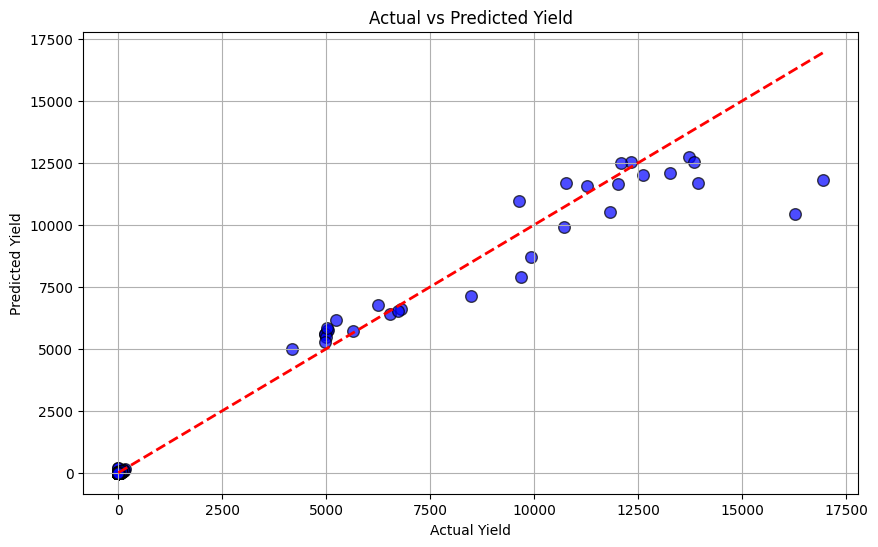

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, s=70)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.title('Actual vs Predicted Yield')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns

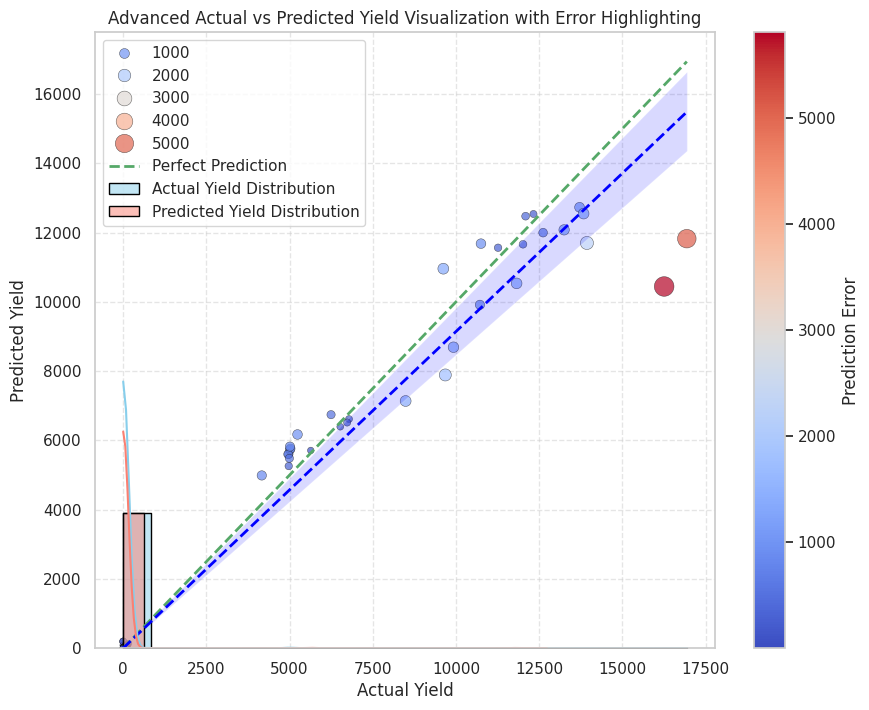

In [ ]:
sns.set(style="whitegrid")

# Create a figure with marginal histograms
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=y_test, y=y_pred, hue=abs(y_test - y_pred), palette='coolwarm', size=abs(y_test - y_pred),
                sizes=(20, 200), alpha=0.7, edgecolor='k', ax=ax)

# Add a color bar to show prediction error
norm = plt.Normalize(abs(y_test - y_pred).min(), abs(y_test - y_pred).max())
sm = plt.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
# Pass the 'ax' to colorbar to specify where to steal space from
cbar = fig.colorbar(sm, ax=ax)  # Changed line: Passing 'ax' to colorbar
cbar.set_label('Prediction Error')

# Plot the ideal prediction line
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--', lw=2, label="Perfect Prediction")

# Add a regression trend line to show overall prediction trend
sns.regplot(x=y_test, y=y_pred, scatter=False, ax=ax, color="blue", line_kws={"linestyle": "--", "lw": 2})

# Set labels and title
ax.set_xlabel("Actual Yield")
ax.set_ylabel("Predicted Yield")
ax.set_title("Advanced Actual vs Predicted Yield Visualization with Error Highlighting")

# Overlay marginal histograms
sns.histplot(y_test, color="skyblue", kde=True, ax=ax, label="Actual Yield Distribution", bins=20, element="step", edgecolor="black")
sns.histplot(y_pred, color="salmon", kde=True, ax=ax, label="Predicted Yield Distribution", bins=20, element="step", edgecolor="black")

# Display the plot with legend and grid
plt.legend(loc="upper left")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

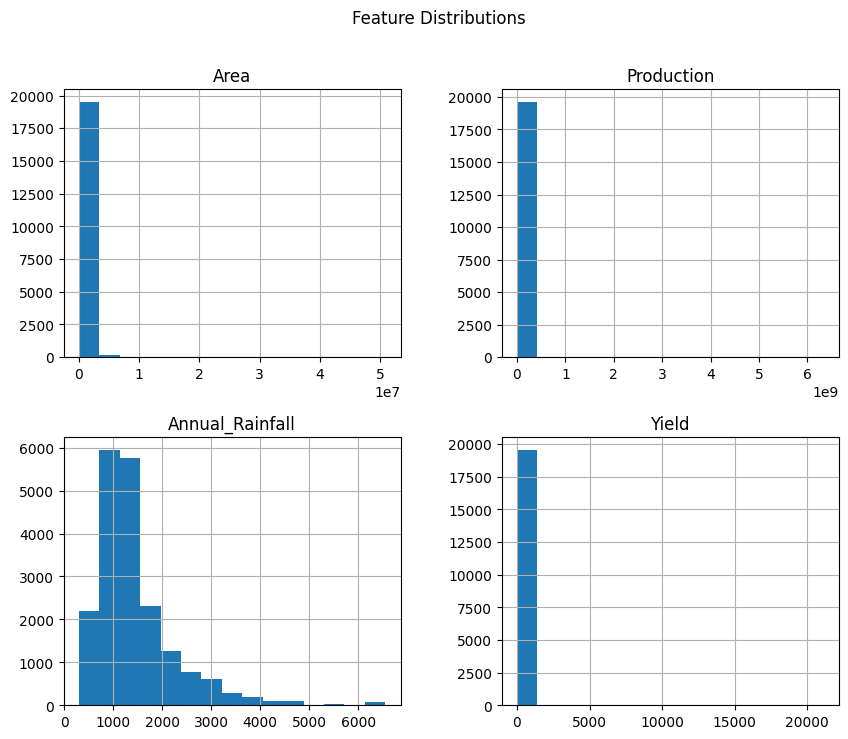

In [ ]:
data = pd.read_csv('g.csv')
data[['Area', 'Production', 'Annual_Rainfall', 'Yield']].hist(bins=15, figsize=(10, 8))
plt.suptitle("Feature Distributions")
plt.show()

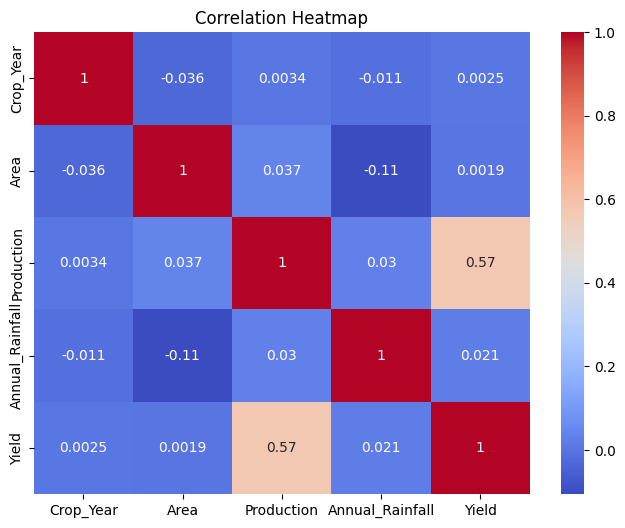

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Yield']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

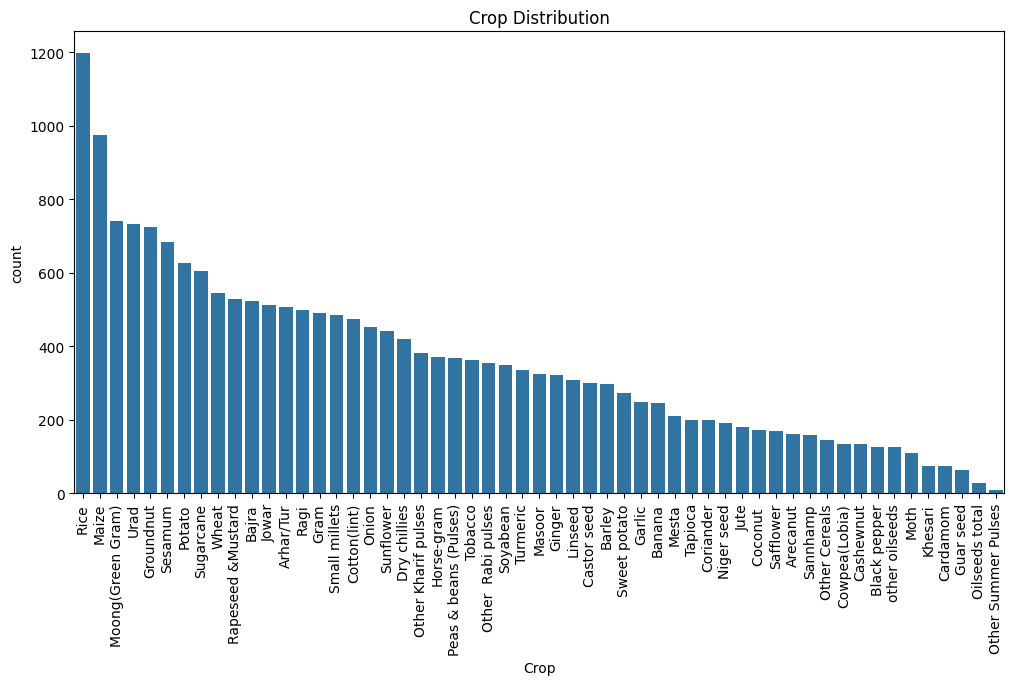

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Crop', order=data['Crop'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crop Distribution")
plt.show()

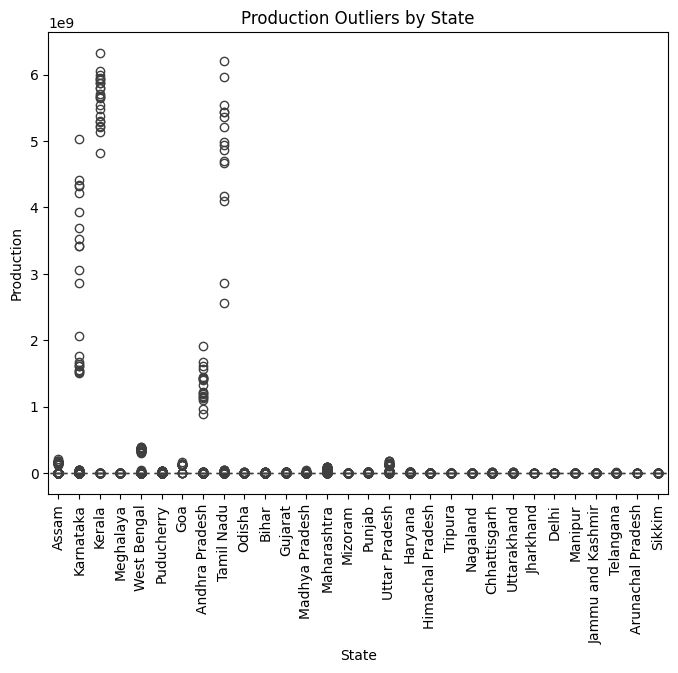

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, y='Production', x='State')
plt.xticks(rotation=90)
plt.title("Production Outliers by State")
plt.show()